# Markowitz Portfolio Network MPN

### Preprocessing Data

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')
print(tickers[1])

                     Company Exchange Symbol                        Industry  \
0                         3M     NYSE    MMM                    Conglomerate   
1           American Express     NYSE    AXP              Financial services   
2                      Amgen   NASDAQ   AMGN               Biopharmaceutical   
3                      Apple   NASDAQ   AAPL          Information technology   
4                     Boeing     NYSE     BA           Aerospace and defense   
5                Caterpillar     NYSE    CAT         Construction and Mining   
6                    Chevron     NYSE    CVX              Petroleum industry   
7              Cisco Systems   NASDAQ   CSCO          Information technology   
8                  Coca-Cola     NYSE     KO                      Soft Drink   
9                     Disney     NYSE    DIS  Broadcasting and entertainment   
10                       Dow     NYSE    DOW               Chemical industry   
11             Goldman Sachs     NYSE   

In [3]:
# tickers = tickers[0]
# symbols = tickers.sort_values('Date first added')['Symbol'][:50]
symbols = tickers[1]['Symbol']

In [4]:
symbols = symbols.reset_index(drop=True)

In [5]:
return_d = pdr.yahoo.daily.YahooDailyReader(symbols, start='JAN-01-2000')
df = return_d.read()
return_d.close()

In [6]:
df = df['Adj Close']
df

Symbols,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,27.959965,35.842434,46.445210,0.787035,26.747141,13.109963,19.325579,39.000431,15.966603,22.631668,...,36.853394,4.908098,30.536070,NaN,19.190569,5.509178,20.405439,NaN,20.111481,46.470001
2000-01-03,26.960112,33.902081,48.668388,0.856887,25.940277,13.545219,18.656284,39.341736,15.452656,23.115248,...,36.794205,4.765745,29.874115,NaN,18.798925,5.573992,19.866816,NaN,19.638775,44.915394
2000-01-04,25.888866,32.621986,44.946987,0.784643,25.899952,13.371123,18.656284,37.134583,15.469790,24.469282,...,35.551311,4.505795,29.299284,NaN,18.549694,5.502700,19.224617,NaN,18.908218,43.234760
2000-01-05,26.638735,31.793430,46.493542,0.796124,27.513657,13.684507,18.990934,37.020828,15.606833,25.484806,...,35.926144,4.765745,28.741875,NaN,18.407288,5.489734,19.866816,NaN,19.123096,42.352417
2000-01-06,28.781261,32.441181,47.266823,0.727229,27.796040,14.380920,19.799650,36.406464,15.623968,24.469282,...,34.722683,4.740987,30.065735,NaN,18.763313,5.690656,19.765909,NaN,18.564438,42.814583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,179.419998,174.470001,231.759995,175.529999,217.449997,222.399994,127.330002,62.119999,60.540001,157.800003,...,318.269989,152.210007,159.009995,237.830002,162.970001,473.720001,53.450001,215.710007,53.910000,143.440002
2022-01-13,181.020004,173.289993,230.850006,172.190002,223.899994,227.000000,126.800003,61.500000,60.900002,155.440002,...,304.799988,149.589996,158.289993,228.630005,163.050003,467.429993,53.520000,215.000000,54.189999,145.470001
2022-01-14,178.740005,168.399994,235.360001,173.070007,225.960007,228.940002,128.960007,61.360001,61.389999,151.940002,...,310.200012,148.179993,159.809998,231.229996,163.210007,468.690002,53.279999,214.669998,54.299999,145.059998


In [7]:
df = df.dropna(axis=1)
df = df.pct_change()
df = df.dropna()

In [8]:
column = df.columns
column

Index(['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT',
       'NKE', 'PG', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT'],
      dtype='object', name='Symbols')

In [9]:
df_train = df.iloc[:4000]
df_test = df.iloc[4000:]
df_train.head()

Symbols,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MCD,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-0.035760,-0.054136,0.047867,0.088753,-0.030166,0.033200,-0.034633,0.008751,-0.032189,0.021367,...,-0.017054,0.006512,-0.001606,-0.029004,-0.021678,-0.020408,0.011765,-0.026396,-0.023504,-0.033454
2000-01-04,-0.039734,-0.037759,-0.076464,-0.084310,-0.001555,-0.012853,0.000000,-0.056102,0.001109,0.058578,...,-0.020505,-0.035120,-0.033780,-0.054546,-0.019242,-0.013258,-0.012790,-0.032325,-0.037200,-0.037418
2000-01-05,0.028965,-0.025399,0.034408,0.014633,0.062305,0.023437,0.017938,-0.003063,0.008859,0.041502,...,0.016103,0.039272,0.010543,0.057692,-0.019025,-0.007677,-0.002356,0.033405,0.011364,-0.020408
2000-01-06,0.080429,0.020374,0.016632,-0.086538,0.010263,0.050891,0.042584,-0.016595,0.001098,-0.039848,...,-0.014264,0.008295,-0.033498,-0.005195,0.046060,0.019342,0.036600,-0.005079,-0.029214,0.010912
2000-01-07,0.019851,0.014558,0.112474,0.047369,0.029027,0.032688,0.017606,0.058750,0.065790,-0.015810,...,0.025724,0.095978,0.013068,0.000000,0.079953,0.039849,0.117312,-0.007384,0.025463,0.075565


In [10]:
xc_train = np.zeros((4000-60-20, 60, 27), np.float32)
xf_train = np.zeros((4000-60-20, 20, 27), np.float32)
xc_test = np.zeros((len(df_test)-60-20, 60, 27), np.float32)
xf_test = np.zeros((len(df_test)-60-20, 20, 27), np.float32)

In [11]:
for i in range(60, 4000-20):
    xc_train[i-60] = df_train.iloc[i-60:i]
    xf_train[i-60] = df_train.iloc[i+1:i+21]

In [12]:
for i in range(60, len(df_test)-20):
    xc_test[i-60] = df_test.iloc[i-60:i]
    xf_test[i-60] = df_test.iloc[i+1:i+21]

In [13]:
print(xc_train.shape, xf_train.shape)
print(xc_test.shape, xf_test.shape)

(3920, 60, 27) (3920, 20, 27)
(1468, 60, 27) (1468, 20, 27)


### Build Model

In [14]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [38]:
xc_train = xc_train #* 20.0
xf_train = xf_train #* 20.0
xc_test = xc_test #* 20.0
xf_test = xf_test #* 20.0

N_time = xc_train.shape[1]
N_future = xf_train.shape[1]
N_stock = xc_train.shape[2]

GAMMA_CONST = 0.1
REG_CONST = 0.1
SAVE_MODEL = 'data/2-1.Markowitz_network.h5'

In [39]:
def markowitz_objective(y_true, y_pred):
    W = y_pred
    xf_rtn = y_true
    W = tf.expand_dims(W, axis=1)
    R = tf.expand_dims(tf.reduce_mean(xf_rtn, axis=1), axis=2)
    C = tfp.stats.covariance(xf_rtn, sample_axis=1)
    
    rtn = tf.matmul(W, R)
    vol = tf.matmul(W, tf.matmul(C, tf.transpose(W, perm=[0, 2, 1])))*GAMMA_CONST
    reg = tf.reduce_sum(tf.square(W), axis=-1)*REG_CONST
    objectice = rtn - vol - reg
    
    return -tf.reduce_mean(objectice, axis=0)
# 마코비츠 최적 가중치를 maximize-> 음수로 바꿔서 loss처럼 계산

In [40]:
xc_input = Input(batch_shape=(None, N_time, N_stock))
h_lstm = LSTM(64, dropout=.5)(xc_input)
y_output = Dense(N_stock, activation='tanh')(h_lstm) #linear projection

y_output = Activation('softmax')(y_output)  # 합이 1인 가중치 분포 출력

model = Model(xc_input, y_output)
model.compile(loss=markowitz_objective, optimizer=Adam(learning_rate=1e-5))

In [41]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60, 27)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                23552     
                                                                 
 dense_2 (Dense)             (None, 27)                1755      
                                                                 
 activation_2 (Activation)   (None, 27)                0         
                                                                 
Total params: 25,307
Trainable params: 25,307
Non-trainable params: 0
_________________________________________________________________


In [42]:
hist = model.fit(xc_train*20, xf_train*20, epochs=150, batch_size=64,
                validation_data=(xc_test*20, xf_test*20))
model.save(SAVE_MODEL)

Epoch 1/150
62/62 [==============================] - 8s 51ms/step - loss: -2.2416e-04 - val_loss: -0.0054
Epoch 2/150
62/62 [==============================] - 2s 30ms/step - loss: -2.1650e-04 - val_loss: -0.0054
Epoch 3/150
62/62 [==============================] - 2s 28ms/step - loss: -2.4703e-04 - val_loss: -0.0054
Epoch 4/150
62/62 [==============================] - 2s 29ms/step - loss: -2.2086e-04 - val_loss: -0.0054
Epoch 5/150
62/62 [==============================] - 2s 31ms/step - loss: -2.4109e-04 - val_loss: -0.0054
Epoch 6/150
62/62 [==============================] - 2s 31ms/step - loss: -2.6859e-04 - val_loss: -0.0054
Epoch 7/150
62/62 [==============================] - 2s 30ms/step - loss: -2.5883e-04 - val_loss: -0.0054
Epoch 8/150
62/62 [==============================] - 2s 30ms/step - loss: -2.9245e-04 - val_loss: -0.0054
Epoch 9/150
62/62 [==============================] - 2s 29ms/step - loss: -3.1776e-04 - val_loss: -0.0054
Epoch 10/150
62/62 [==========================

Epoch 79/150
62/62 [==============================] - 2s 30ms/step - loss: -0.0020 - val_loss: -0.0056
Epoch 80/150
62/62 [==============================] - 2s 28ms/step - loss: -0.0021 - val_loss: -0.0056
Epoch 81/150
62/62 [==============================] - 2s 30ms/step - loss: -0.0020 - val_loss: -0.0056
Epoch 82/150
62/62 [==============================] - 2s 28ms/step - loss: -0.0021 - val_loss: -0.0056
Epoch 83/150
62/62 [==============================] - 2s 31ms/step - loss: -0.0021 - val_loss: -0.0055
Epoch 84/150
62/62 [==============================] - 2s 31ms/step - loss: -0.0021 - val_loss: -0.0055
Epoch 85/150
62/62 [==============================] - 2s 31ms/step - loss: -0.0021 - val_loss: -0.0055
Epoch 86/150
62/62 [==============================] - 2s 29ms/step - loss: -0.0021 - val_loss: -0.0055
Epoch 87/150
62/62 [==============================] - 2s 28ms/step - loss: -0.0022 - val_loss: -0.0055
Epoch 88/150
62/62 [==============================] - 2s 32ms/step - loss

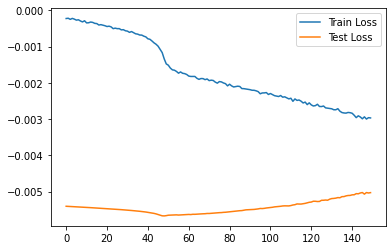

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 892ms/step


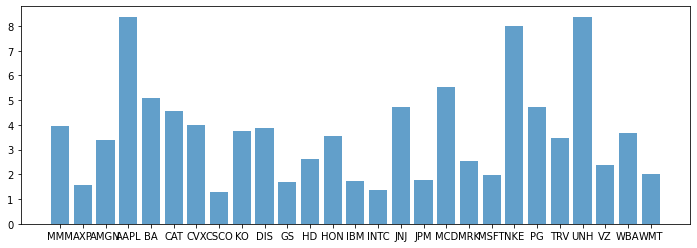

In [44]:
def chech_w(n=0):
    plt.figure(figsize=(12,4))
    y_pred = model.predict(xc_test[n].reshape(1, N_time, N_stock))[0]
    plt.bar(column, y_pred*100, alpha=.7)
    plt.show()
chech_w(0)

xc_test[0]으로 추정한 xf_test[0]의 최적 투자비율(W)

In [45]:
model = tf.keras.models.load_model(SAVE_MODEL, compile=False)

mpn_value = [10000]
crp_value = [10000]

w_crp = np.ones(N_stock)/N_stock
w_history = []
for i in range(N_future, xc_test.shape[0], N_future):
    x = xc_test[i][np.newaxis, :, :]*20
    w_mpn = model.predict(x)[0]
    w_history.append(w_mpn)
    
    m_rtn = np.sum(xf_test[i], axis=0)
    
    mpn_value.append(mpn_value[-1] * np.exp(np.dot(w_mpn, m_rtn)))
    crp_value.append(crp_value[-1] * np.exp(np.dot(w_crp, m_rtn)))

1/1 [==============================] - 0s 57ms/step


In [46]:
test_date = []
for i in range(0, xc_test.shape[0], N_future):
    test_date.append(df_test.index[i])
print(len(test_date))

74


In [47]:
idx = np.arange(0, len(xc_test), N_future)

perf_df = pd.DataFrame({'crp':crp_value, 'markowitz':mpn_value},
                       index=df_test.index[idx])

In [48]:
perf_df

,crp,markowitz
Date,,
2015-11-25,10000.000000,10000.000000
2015-12-24,10245.186330,10170.867443
2016-01-26,9921.120019,9814.138121
2016-02-24,10135.504560,10004.429451
2016-03-23,10663.689003,10484.138560
...,...,...
2021-05-21,26329.294488,27322.368896
2021-06-21,25919.146918,26815.741473
2021-07-20,27118.117412,28210.445762


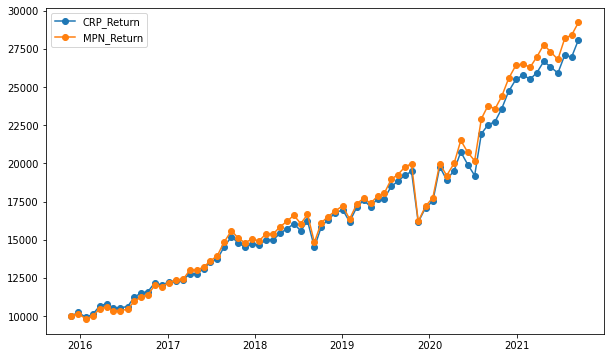

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(perf_df['crp'], 'o-', label='CRP_Return')
plt.plot(perf_df['markowitz'], 'o-', label='MPN_Return')
plt.legend()
plt.show()

In [50]:
xc_test

array([[[-0.00076104,  0.00083783,  0.00718756, ..., -0.00597482,
          0.00566729,  0.00534009],
        [ 0.00228405,  0.002232  , -0.00262295, ...,  0.006901  ,
          0.00935258, -0.00580971],
        [-0.00892453, -0.0029232 , -0.01479908, ...,  0.00486408,
         -0.00178178, -0.01753221],
        ...,
        [-0.00210469,  0.01034168,  0.00549236, ..., -0.00157039,
          0.01332481,  0.0084218 ],
        [ 0.00798988,  0.01681587, -0.01039207, ...,  0.00412909,
          0.01585667,  0.01500138],
        [-0.0097021 , -0.00934731, -0.00875038, ..., -0.00861573,
         -0.00088846,  0.01295155]],

       [[ 0.00228405,  0.002232  , -0.00262295, ...,  0.006901  ,
          0.00935258, -0.00580971],
        [-0.00892453, -0.0029232 , -0.01479908, ...,  0.00486408,
         -0.00178178, -0.01753221],
        [ 0.00204364,  0.00781716,  0.00546224, ...,  0.00286043,
         -0.00047605,  0.00254931],
        ...,
        [ 0.00798988,  0.01681587, -0.01039207, ...,  